### Objective: The main objective of this project is to implement machine learning algorithms to detect credit card fraud detection with respect to time and amount of transaction.

# Part 1: Data Preprocessing

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#### dataset link: https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv

In [2]:
# Import dataset.
dataset = pd.read_csv('N:\Projects\Machine Learning Project\Credit Card Fraud Detection\creditcard.csv')

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dataset.shape

(284807, 31)

In [7]:
# all columns.
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# Dataset information.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Dataset having null values or not?
dataset.isnull().values.any()

False

In [10]:
# Sum of all null values in dataset.
dataset.isnull().values.sum()

0

In [11]:
# Statistical summary
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
# Categorical Columns
dataset.select_dtypes(include='object').columns

Index([], dtype='object')

In [13]:
# Number of categorical columns.
len(dataset.select_dtypes(include='object').columns)

0

<AxesSubplot:xlabel='Class', ylabel='count'>

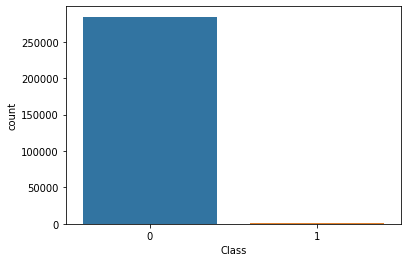

In [14]:
# CountPlot
sns.countplot(dataset['Class'])

In [15]:
# Non Fraudulent Transaction
(dataset.Class == 0).sum()

284315

In [16]:
# Fraudulent Transaction
(dataset.Class == 1).sum()

492

In [17]:
# Correlation Matrix
dataset_2 = dataset.drop(columns='Class')

<AxesSubplot:title={'center':'Correlated with Class'}>

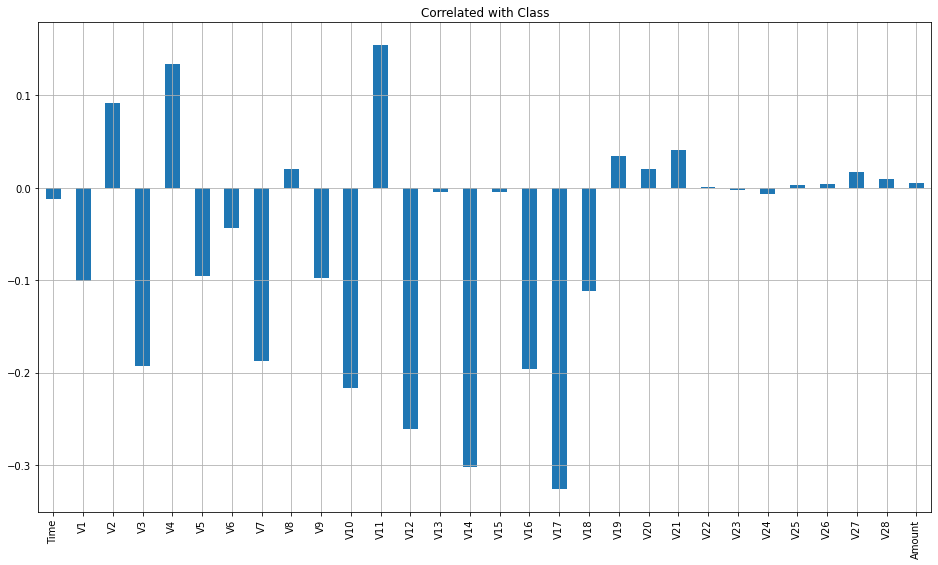

In [18]:
# Independent features correlated with dependent feature Class.
dataset_2.corrwith(dataset['Class']).plot.bar(
    figsize=(16,9), title='Correlated with Class', grid=True)

In [19]:
corr = dataset.corr()

<AxesSubplot:>

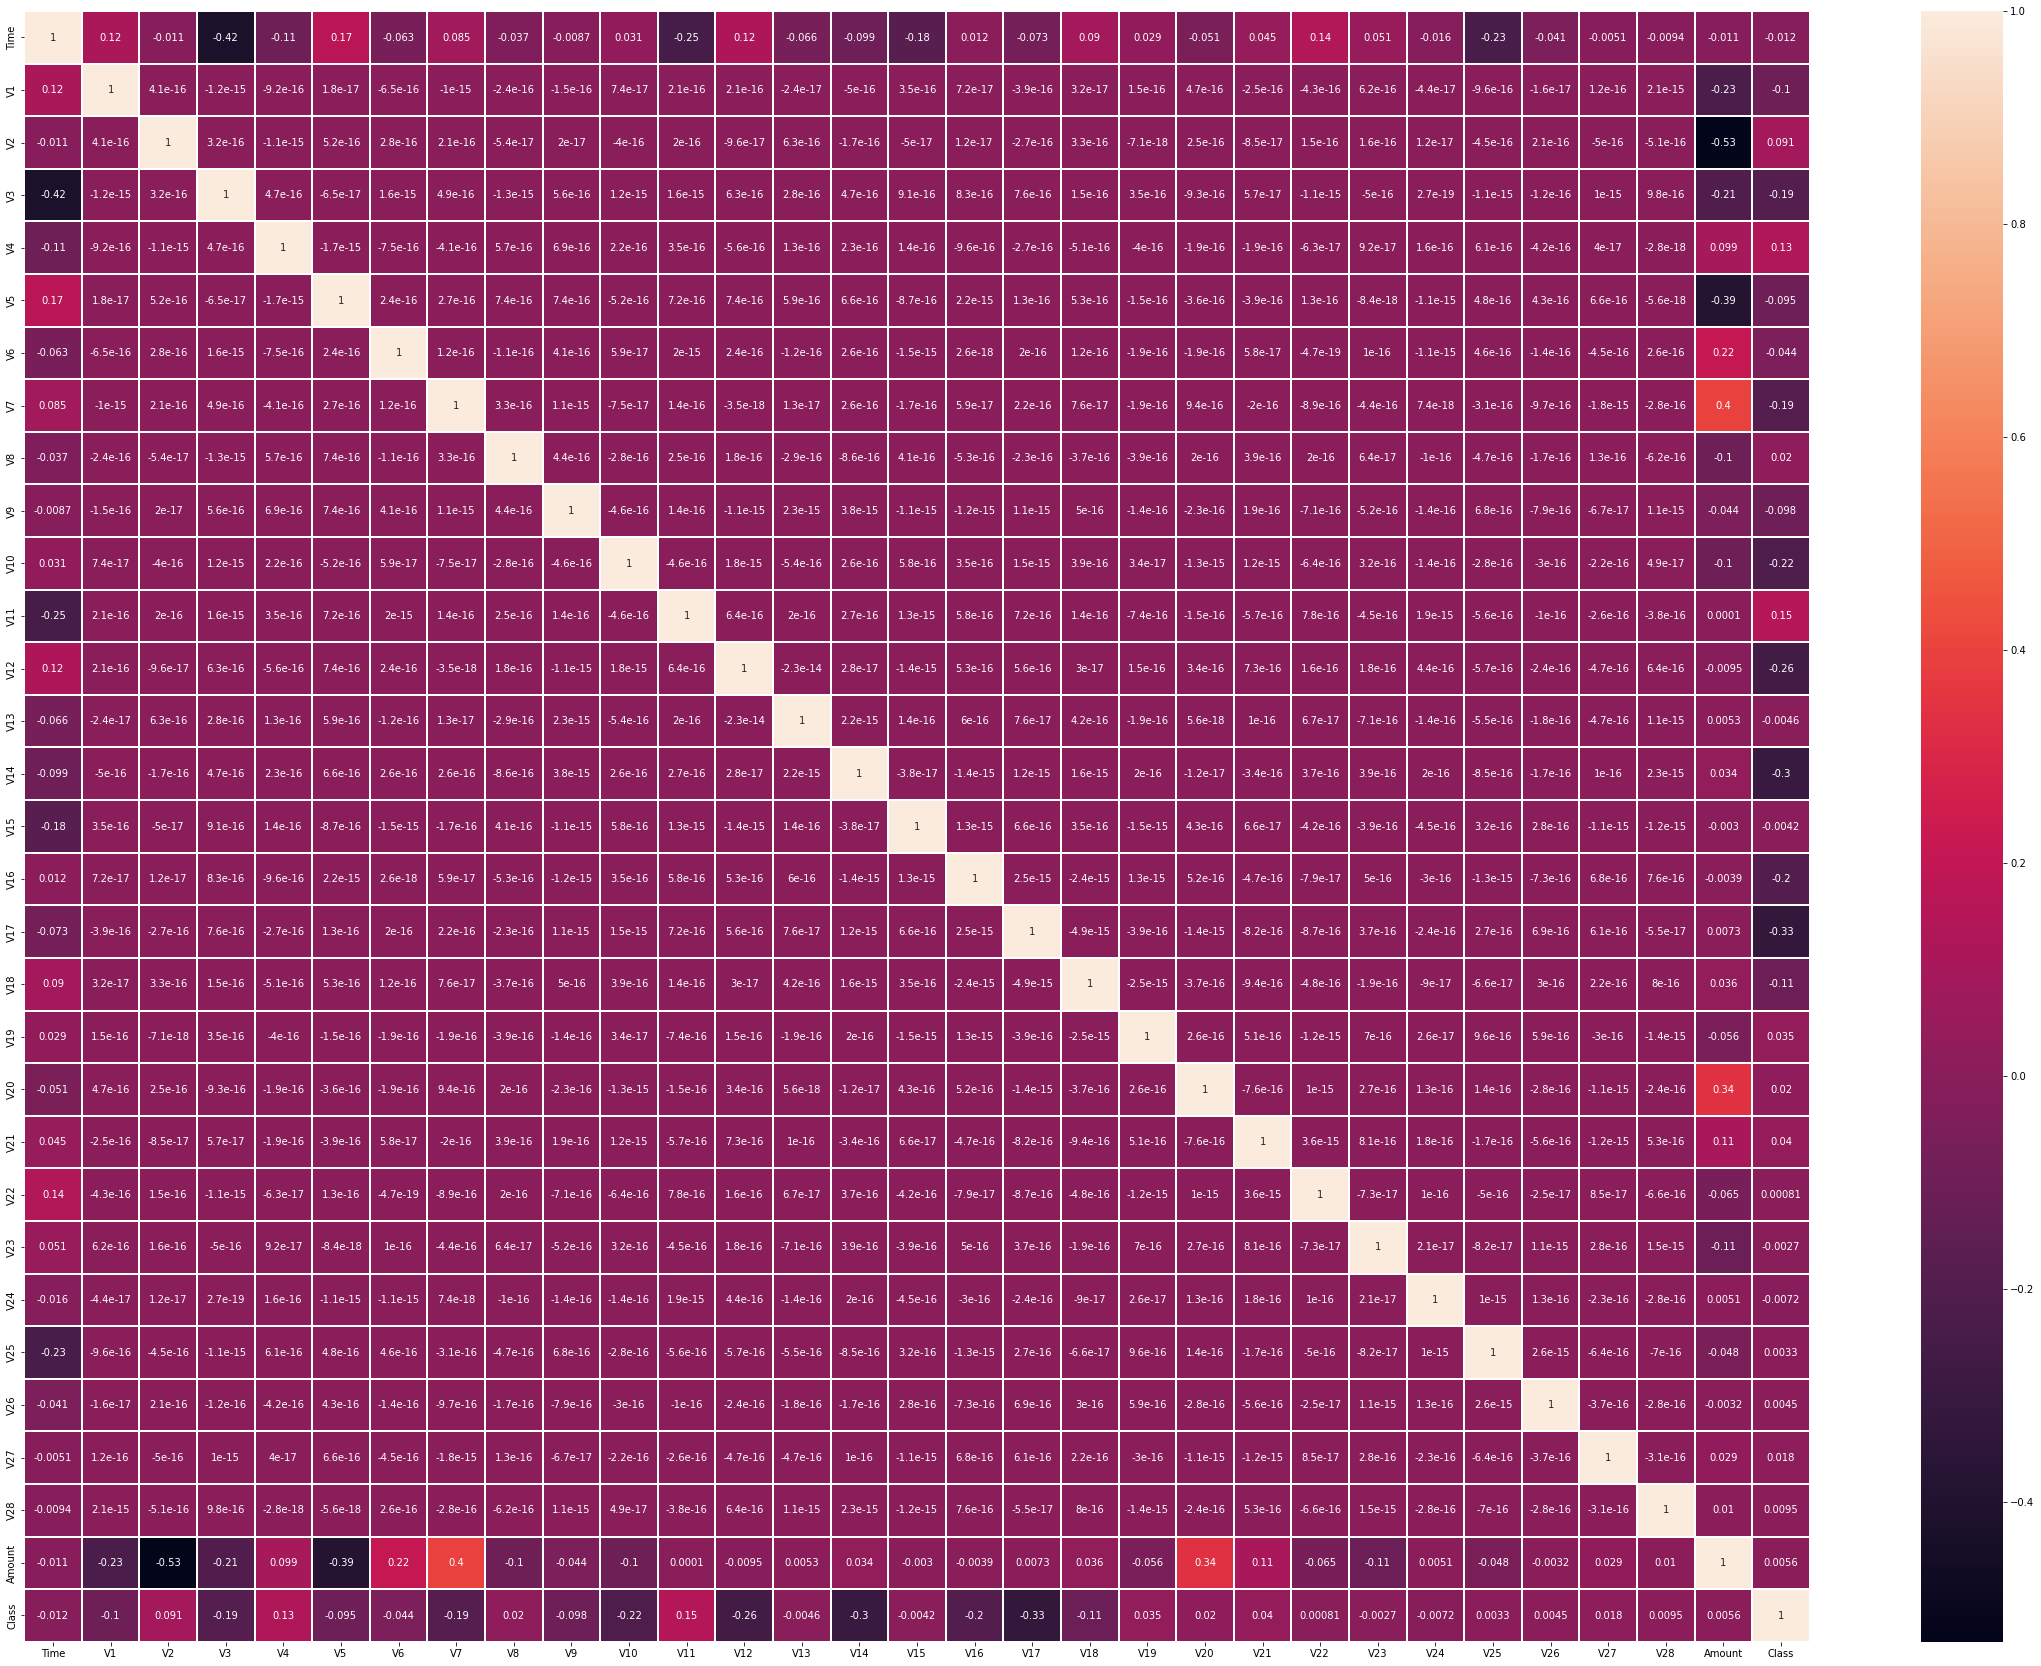

In [20]:
# Heatmap
plt.figure(figsize=(40,30))
sns.heatmap(corr, annot=True, linewidths=2)

# Splitting the dataset

In [21]:
# Independent Variables
x = dataset.drop(columns='Class')

In [22]:
# dependent variables
y = dataset['Class']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [25]:
x_train.shape

(227845, 30)

In [26]:
y_train.shape

(227845,)

In [27]:
x_test.shape

(56962, 30)

In [28]:
y_test.shape

(56962,)

## Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [31]:
x_train

array([[-0.87750986, -0.57177938,  0.62828369, ...,  0.57377804,
        -0.2196612 , -0.30511629],
       [-1.15308534,  0.62679248, -0.08362249, ..., -0.17091545,
         0.00631402, -0.25423683],
       [ 1.26383162,  0.98361214, -0.1198731 , ...,  0.13283995,
        -0.10128286, -0.32950779],
       ...,
       [-0.38349503,  0.77210803, -0.57499928, ..., -0.00209668,
         0.01184758, -0.21662151],
       [ 0.05096267,  0.91851362, -1.02985151, ..., -0.08231776,
        -0.10081197,  0.33333622],
       [-0.41989457, -0.30294167,  0.45385207, ...,  0.21715744,
         0.36857129, -0.29286006]])

In [32]:
x_test

array([[ 0.65238668, -0.16686457,  0.64154241, ...,  0.27172397,
         0.50280513, -0.19606009],
       [ 1.31372573, -0.18035885,  0.56586861, ...,  0.19283776,
         0.54777109, -0.34934352],
       [ 1.21343225, -0.82732765, -1.45828848, ...,  0.7146577 ,
         1.36386022,  0.02971246],
       ...,
       [ 0.89086789,  0.57407801, -1.38701874, ..., -0.5986488 ,
        -0.02294377,  1.99397392],
       [ 1.39073528,  1.05455377,  0.17341371, ..., -0.2555804 ,
        -0.19207626, -0.34543281],
       [ 1.22637946,  1.20109412, -0.80279701, ...,  0.01953937,
        -0.16055905, -0.2968514 ]])

# Part 2: Building the Model

In [33]:
# 1: Logistic Regression
from sklearn.linear_model import LogisticRegression

In [34]:
classifier_lr = LogisticRegression()
classifier_lr.fit(x_train, y_train)

LogisticRegression()

In [35]:
y_pred = classifier_lr.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
acc = accuracy_score(y_test, y_pred)

In [38]:
# Accuracy
print(acc*100,"%")

99.91924440855307 %


In [39]:
# Confusion matrix.
cm = confusion_matrix(y_test, y_pred)

In [40]:
cm

array([[56852,     9],
       [   37,    64]], dtype=int64)

In [41]:
# 2: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [42]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
y_pred = classifier_rf.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [45]:
# Accuracy
acc = accuracy_score(y_test, y_pred)

In [46]:
print(acc*100,"%")

99.94908886626172 %


In [47]:
# Confusion matrix.
cm = confusion_matrix(y_test, y_pred)

In [48]:
cm

array([[56854,     7],
       [   22,    79]], dtype=int64)

In [49]:
# 3: XGBoost Classifier
from xgboost import XGBClassifier

In [50]:
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [51]:
y_pred = classifier_xgb.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
acc = accuracy_score(y_test, y_pred)

In [54]:
# Accuracy
print(acc*100,"%")

99.95962220427653 %


In [55]:
# Confusion matrix.
cm = confusion_matrix(y_test, y_pred)

In [56]:
cm

array([[56855,     6],
       [   17,    84]], dtype=int64)

# Part 3: Final Model

In [57]:
from xgboost import XGBClassifier

In [58]:
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [59]:
y_pred = classifier.predict(x_test)

In [60]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(acc*100,"%")

99.95962220427653 %


In [61]:
# Confusion matrix.
cm = confusion_matrix(y_test, y_pred)
cm

array([[56855,     6],
       [   17,    84]], dtype=int64)

# Predicting a single observation

In [62]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [63]:
dataset.shape

(284807, 31)

In [64]:
single_obs = [[0, -1.359807134, -0.072781173, 2.536346738, 1.378155224, -0.33832077, 0.462387778, 0.239598554, 0.098697901, 0.36378697, 0.090794172, -0.551599533, -0.617800856, -0.991389847, -0.311169354, 1.468176972, -0.470400525, 0.207971242, 0.02579058, 0.40399296, 0.251412098, -0.018306778, 0.277837576, -0.11047391, 0.066928075, 0.128539358, -0.189114844, 0.133558377, -0.021053053, 149.62
]]

In [65]:
classifier.predict(sc.transform(single_obs))

array([0])